## Sample Graph (AI Agent)

In [2]:
%%capture --no-stderr
%pip install -U langgraph langsmith langchain_antropic

### Graph State

In [3]:
from typing import TypedDict

class State(TypedDict):
    graph_msg: str

### Nodes

In [5]:
def node_01(state: State):
    print(f"Node 01: {state['graph_message']}")
    # Override the graph state (graph_msg)
    return {"graph_msg": state['graph_msg'] + " node_01"}


In [6]:
def node_02(state: State):
    print(f"Node 02: {state['graph_message']}")
    # Override the graph state (graph_msg)
    return {"graph_msg": state['graph_msg'] + " node_02"}


In [7]:
def node_03(state: State):
    print(f"Node 03: {state['graph_message']}")
    # Override the graph state (graph_msg)
    return {"graph_msg": state['graph_msg'] + " node_03"}


### Building Graph

In [9]:
from langgraph.graph import StateGraph, END, START

In [10]:
import random
from typing import Literal

def select_next_node(state: State) -> Literal["node_02", "node_03"]:
    next_node = random.choice(["node_02", "node_03"])
    print(f"Selected Node: {next_node}")
    return next_node

In [25]:
# Create Builder

builder = StateGraph(State)

builder.add_node("node_01", node_01)
builder.add_node("node_02", node_02)
builder.add_node("node_03", node_03)

# Add Edges
builder.add_edge(START, "node_01")
builder.add_conditional_edges("node_01", select_next_node)
builder.add_edge("node_02", END)
builder.add_edge("node_03", END)

graph = builder.compile()

### Visualize Graph

In [26]:
from IPython.display import display, Image

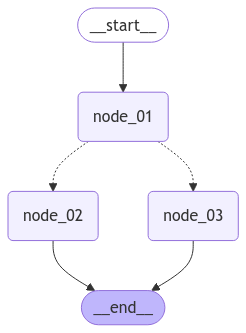

In [27]:
display(Image(graph.get_graph().draw_mermaid_png()))